In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
data_dir='/kaggle/input/fer2013/train'
from keras.layers import Dense, Activation
from keras import Sequential
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
import tensorflow 
import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

In [49]:
from tensorflow.keras.models import Sequential 
from keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization,Activation,Dropout
from keras.optimizers import Adam


In [50]:
classifier=Sequential()

In [51]:
#input layer
classifier.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))
#hidden layer
classifier.add(Conv2D(128,(5,5),padding="same"))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))



classifier.add(Conv2D(512,(3,3),padding="same"))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(512,(3,3),padding="same"))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25)) 

classifier.add(Flatten())
#dense layer or fully connected layer

classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.25))


classifier.add(Dense(512))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.25))


classifier.add(Dense(7,activation='softmax'))

opt=Adam(lr=0.0001)

classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)      

In [52]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
train_set=ImageDataGenerator(
       rescale=1.0/255,
       shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [54]:
test_set=ImageDataGenerator(rescale=1.0/255)

In [55]:
import os
classes = os.listdir(data_dir)

In [56]:
print(classes)

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [57]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [58]:
classes=os.listdir(data_dir)
images_count=[len(os.listdir(os.path.join(data_dir,classes[i]))) for i in range(7)]
print(classes)
print(images_count)

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
[3171, 4097, 3995, 4965, 4830, 436, 7215]


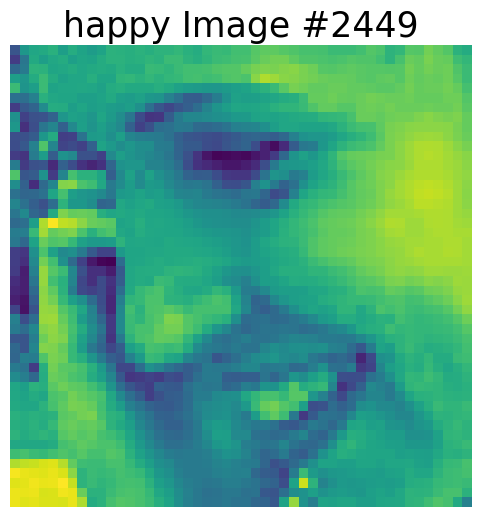

In [59]:
import numpy as np 
import os 
import PIL 
from PIL import Image 
import tensorflow as tf 
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
happy = os.listdir(os.path.join(data_dir,'happy'))                                                    # List of image files containing roses
plt.figure(figsize = (6,6))                                    # Adjusting Figure Size
num = np.random.randint(len(happy))+1                            # Python index starts from 0 hence + 1 is seen here
img = Image.open(os.path.join(data_dir, "happy", happy[num]))    # Get a random rose image based on the num got from above line
plt.title(f"happy Image #{num}", fontsize = 25)                  # Adding title to the plot
plt.imshow(img)                                                  # Showing the figure
plt.axis('off')                                                  # Turning off the axes
plt.show()  


In [60]:
train_data=train_set.flow_from_directory(data_dir,
                                      target_size=(48,48),
                                      batch_size=128,
                                       color_mode='grayscale',
                                      class_mode='categorical',
                                      shuffle=True)

Found 28709 images belonging to 7 classes.


In [61]:
path='/kaggle/input/fer2013/test'
test_data=test_set.flow_from_directory(path,
                                      target_size=(48,48),
                                      batch_size=128,
                                       color_mode='grayscale',
                                      class_mode='categorical',
                                      shuffle=False)

Found 7178 images belonging to 7 classes.


In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [63]:

epochs=48

classifier.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])


num=train_data.n//train_data.batch_size
num2=test_data.n //  test_data.batch_size


In [64]:
result=classifier.fit(train_data,
                               steps_per_epoch=num,
                               validation_data=test_data,
                                validation_steps=num2,
                                epochs=epochs,
                               )

Epoch 1/48
224/224 [==============================] - 322s 1s/step - loss: 1.8658 - accuracy: 0.2684 - val_loss: 1.8379 - val_accuracy: 0.1731
Epoch 2/48
224/224 [==============================] - 61s 271ms/step - loss: 1.5902 - accuracy: 0.3836 - val_loss: 1.7668 - val_accuracy: 0.3182
Epoch 3/48
224/224 [==============================] - 55s 247ms/step - loss: 1.4057 - accuracy: 0.4580 - val_loss: 1.3582 - val_accuracy: 0.4699
Epoch 4/48
224/224 [==============================] - 52s 232ms/step - loss: 1.3121 - accuracy: 0.4971 - val_loss: 1.4258 - val_accuracy: 0.4689
Epoch 5/48
224/224 [==============================] - 51s 228ms/step - loss: 1.2539 - accuracy: 0.5224 - val_loss: 1.2544 - val_accuracy: 0.5056
Epoch 6/48
224/224 [==============================] - 52s 234ms/step - loss: 1.2094 - accuracy: 0.5363 - val_loss: 1.2586 - val_accuracy: 0.5131
Epoch 7/48
224/224 [==============================] - 54s 241ms/step - loss: 1.1814 - accuracy: 0.5515 - val_loss: 1.2807 - val_accu

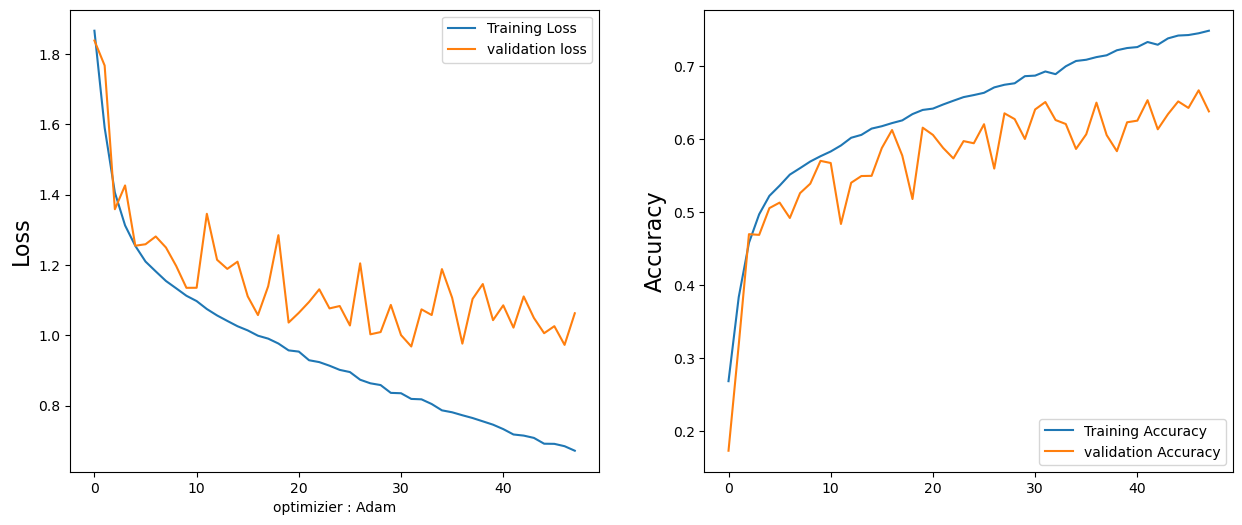

In [76]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xlabel('optimizier : Adam',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(result.history['loss'],label='Training Loss')
plt.plot(result.history['val_loss'],label='validation loss')
plt.legend(loc='upper right')



plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(result.history['accuracy'],label='Training Accuracy')
plt.plot(result.history['val_accuracy'],label='validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [65]:
tensorflow.debugging.disable_traceback_filtering()